In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Data Cleaning
# checking Null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Replacing null values of Age column by average
df['Age']=df['Age'].fillna(round(df['Age'].mean(),2))

In [9]:
# irrelevant columns
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

<Axes: title={'center': 'Embarked count plot'}, xlabel='Embarked'>

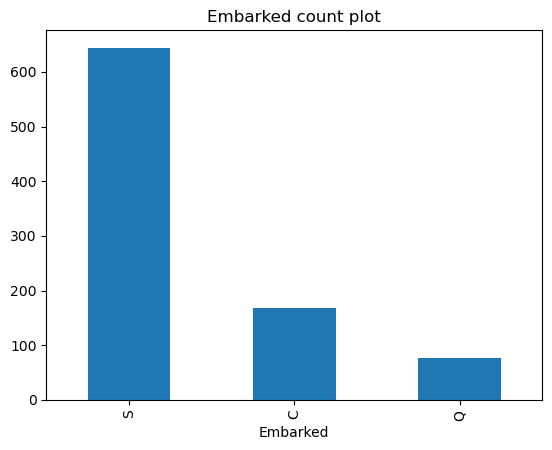

In [10]:
plt.title('Embarked count plot')
df['Embarked'].value_counts().plot(kind='bar')

In [11]:
df['Embarked']=df['Embarked'].fillna('S')

In [12]:
import myStats
for col_name in df.select_dtypes('number'):
    print(col_name)
    myStats.cal_stats(df[col_name])
    print('-'*50)

Survived
Total Sum: 342
Total Count: 891
Min Value: 0
Max Value: 1
Range: 1
Average: 0.3838383838383838
Median: 0.0
Mode: ModeResult(mode=0, count=549)
Quartile 1: 0.0
Quartile 3: 1.0
Inter Quartile Range: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Variance: 0.2365064789307223
Standard Deviation: 0.48631931786710086
Skewness:  0.4777174662568536
Kurtosis:  1.2282139775668681
--------------------------------------------------
Pclass
Total Sum: 2057
Total Count: 891
Min Value: 1
Max Value: 3
Range: 2
Average: 2.308641975308642
Median: 3.0
Mode: ModeResult(mode=3, count=491)
Quartile 1: 2.0
Quartile 3: 3.0
Inter Quartile Range: 1.0
Lower Whisker: 0.5
Upper Whisker: 4.5
Variance: 0.6982305912347103
Standard Deviation: 0.8356019334795189
Skewness:  -0.6294858816096934
Kurtosis:  1.7204303181299612
--------------------------------------------------
Age
Total Sum: 26462.07
Total Count: 891
Min Value: 0.42
Max Value: 80.0
Range: 79.58
Average: 29.69929292929293
Median: 29.7
Mode: ModeResult(mo

Survived


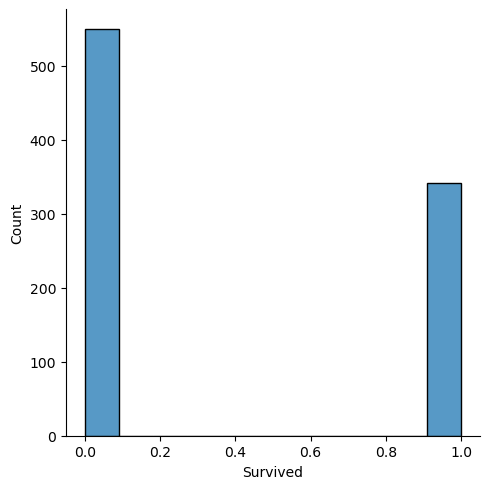

Pclass


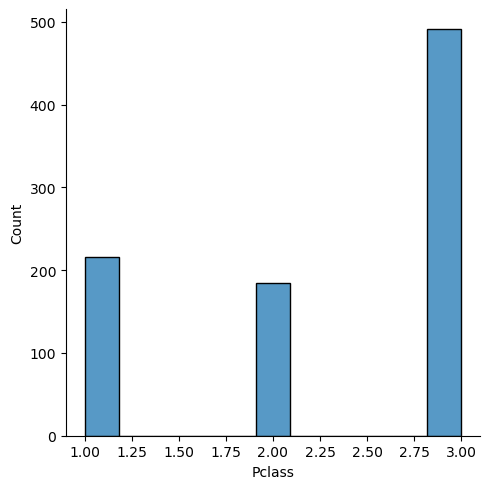

Age


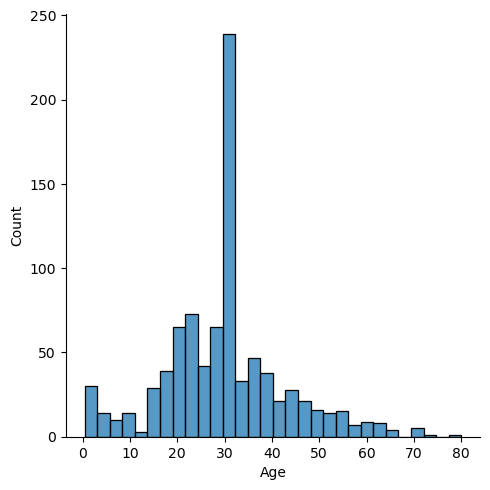

SibSp


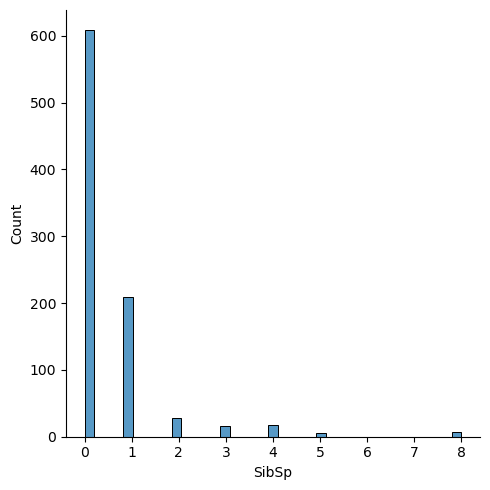

Parch


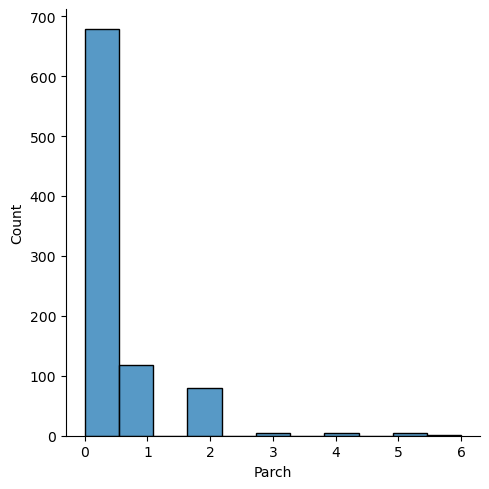

Fare


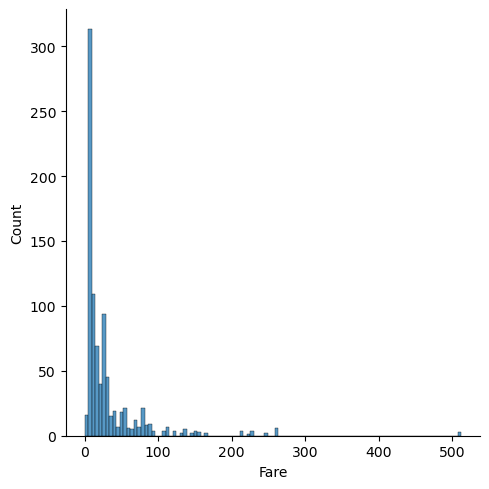

In [13]:
for col_name in df.select_dtypes('number'):
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

Sex


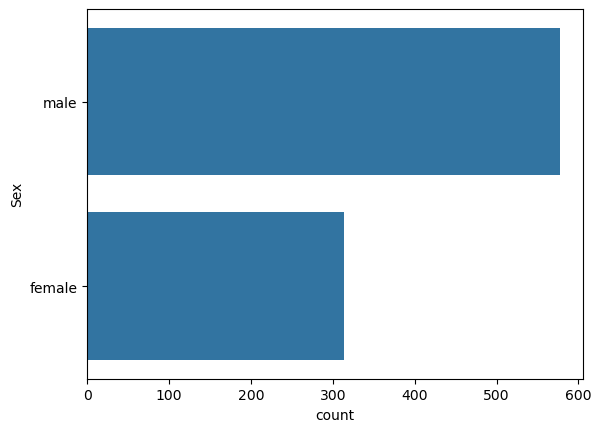

Embarked


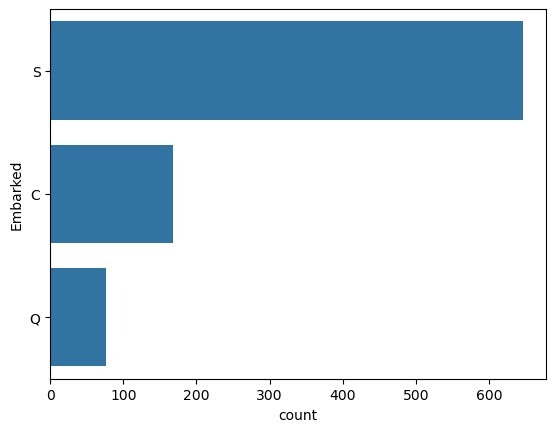

In [14]:
for col_name in df.select_dtypes('object'):
    print(col_name)
    sns.countplot(df[col_name])
    plt.show()

Survived


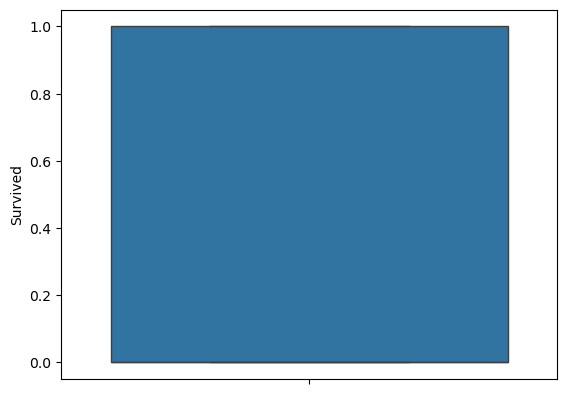

Pclass


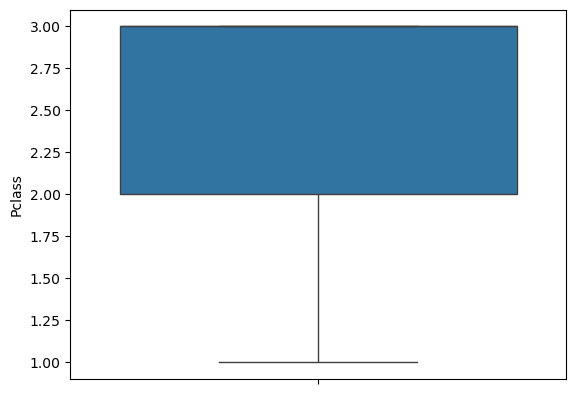

Age


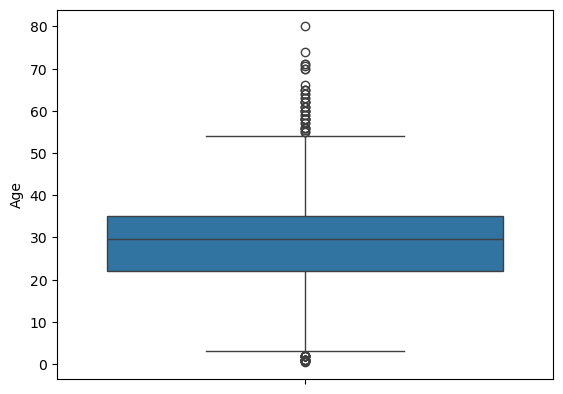

SibSp


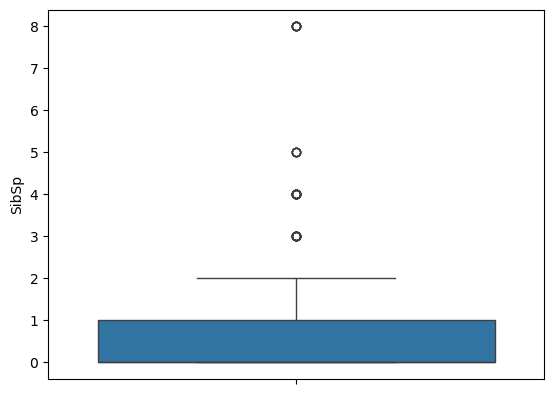

Parch


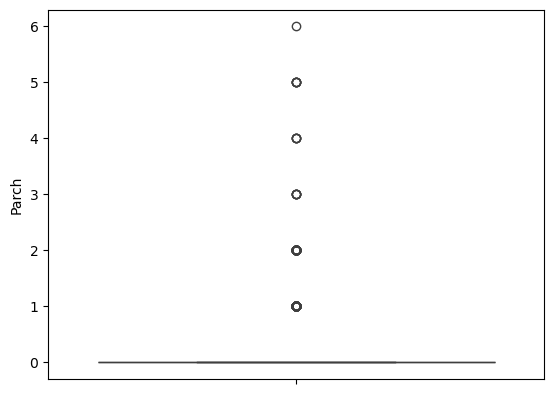

Fare


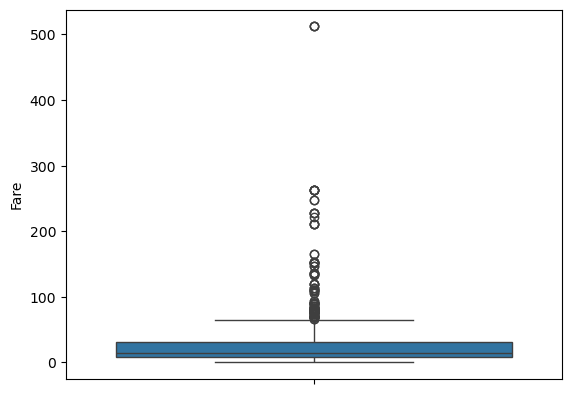

In [15]:
for col_name in df.select_dtypes('number'):
    print(col_name)
    sns.boxplot(df[col_name])
    plt.show()

<Axes: >

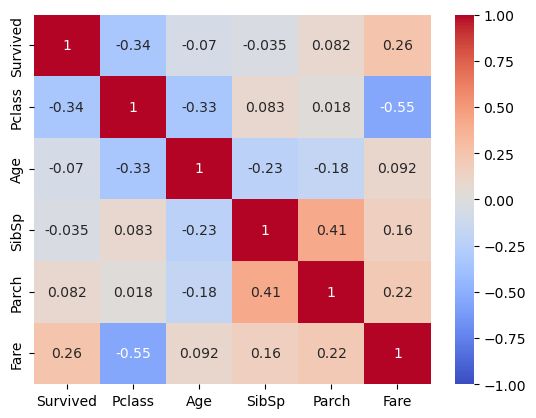

In [16]:
# correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [17]:
# one hot encoding
df=pd.get_dummies(df, dtype=int, drop_first=True)

In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
# adding new column as total Family
df['Total fam']=df['SibSp']+df['Parch']

In [20]:
#X=input data, y=output
X=df.drop('Survived', axis=1)
y=df['Survived']

In [21]:
#standardization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [22]:
X=pd.DataFrame(X,columns=df.drop('Survived',axis=1).columns)

In [23]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Total fam
0,0.827377,-0.592494,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838,0.059160
1,-1.566107,0.638776,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803,0.059160
2,0.827377,-0.284677,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838,-0.560975
3,-1.566107,0.407912,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838,0.059160
4,0.827377,0.407912,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838,-0.560975


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [25]:
lr.coef_

array([[-0.90400359, -0.5046751 , -0.24313981,  0.00663603,  0.10251644,
        -1.28827191, -0.00940614, -0.18341215, -0.16286245]])

In [26]:
lr.intercept_

array([-0.64513085])

In [27]:
# Loading test file
df_test=pd.read_csv('Titanic_test.csv')

In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# irrelevant columns
df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [30]:
df_test['Total fam']=df['SibSp']+df['Parch']

In [31]:
# one hot encoding
df_test=pd.get_dummies(df, dtype=int, drop_first=True)

In [32]:
X_test=df_test.drop('Survived',axis=1)

In [33]:
y_test=df_test['Survived']

In [34]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Total fam
0,3,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_test=ss.fit_transform(X_test)

In [36]:
X_test=pd.DataFrame(X_test,columns=df.drop('Survived',axis=1).columns)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Total fam
0,0.827377,-0.592494,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838,0.059160
1,-1.566107,0.638776,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803,0.059160
2,0.827377,-0.284677,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838,-0.560975
3,-1.566107,0.407912,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838,0.059160
4,0.827377,0.407912,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838,-0.560975


In [37]:
y_test.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
y_pred=lr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

